## Santander Value Prediction Challenge
#### Predict the value of transactions for potential customers.

According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. Banking is no exception.

The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. In their 3rd Kaggle competition, Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to determine the amount or value of the customer's transaction. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.

In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.


The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import gc

In [2]:
for p in [np, pd, sns]:
    print(p.__version__)

1.14.3
0.23.0
0.8.1


### Feature Engineering

1. Concatenate the train and test data together to ensure range consistency
2. Remove columns with zero standard deviation in the train dataset from both dataset
3. Normalize the features to 0 - 1 range using minmaxscaler
4. For each row, add mean, std dev, median, maximum.
5. 

### Read the data

In [4]:
train = pd.read_csv("../data/train.csv.zip")
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [6]:
# Test Dataset
test = pd.read_csv("../data/test.csv.zip")
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Concatenate the data
data = pd.concat([train, test], axis=0, sort=False).reset_index().drop('index', axis=1)
data.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000fbd867,600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0027d6b71,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0028cbf45,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002a68644,14400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Verify the concatenation is correct
assert data.target.isnull().sum() == test.shape[0]
assert (~data.target.isnull()).sum() == train.shape[0]

In [9]:
data.target.isnull().sum(), (~data.target.isnull()).sum()

(49342, 4459)

##### Rename the columns to `x1..x4993` for easy reference

In [10]:
old_feature_names = [n for n in data.columns if n not in ('ID','target')]
new_feature_names = ['x'+str(i) for i in range(1,len(data.columns)-1)]
assert len(old_feature_names) == len(new_feature_names)
feature_map = {k:v for (k,v) in zip(new_feature_names, old_feature_names)}

In [11]:
data.rename(columns=dict(zip(train.columns, ['ID','target']+new_feature_names)), inplace=True) 

In [12]:
data.head()

,ID,target,x1,x2,x3,x4,x5,x6,x7,x8,...,x4982,x4983,x4984,x4985,x4986,x4987,x4988,x4989,x4990,x4991
0,000d6aaf2,38000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000fbd867,600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0027d6b71,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0028cbf45,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002a68644,14400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Remove columns with zero variation

In [13]:
train_stats = data.loc[~data.target.isnull(),:].describe()

In [14]:
cols_zero_std = train_stats.loc['std'].loc[train_stats.loc['std'].values <= 0].index.tolist()
print("There are {0} columns that have no variation".format(len(cols_zero_std)))

There are 256 columns that have no variation


In [15]:
data.drop(cols_zero_std, axis=1, inplace=True)

### How many rows are simulated 
A row is simulated if its values have 4 or more decimal places
inspired by: 

https://www.kaggle.com/c/santander-value-prediction-challenge/discussion/61288

In [67]:
decimal_threshold = 3
feature_decimal = (data.loc[:,data.columns[2:].tolist()].values*10**decimal_threshold) % 1
num_decimal = np.sum((feature_decimal > 10e-6) & (feature_decimal < 1 - 10e-6), axis=1)    # floating-point arithmetic quirks
print("Rows with at least 1 column with more than " + str(decimal_threshold) + " decimal places = {0}".format(np.sum(num_decimal>0)))

Rows with at least 1 column with more than 3 decimal places = 31628


In [82]:
# Create new train and test data by removing the simulated data
simulated, real = data.loc[num_decimal > 0,:].copy(), data.loc[~(num_decimal > 0),:].copy()
train_new, test_new = real.loc[~real.target.isnull(),:].copy(), real.loc[real.target.isnull(),:].copy()
print("Simulated data size = {0}".format(simulated.shape[0]))
print("Real data size      = {0}".format(real.shape[0]))
print("Train size          = {0}".format(train_new.shape[0]))
print("Test data size      = {0}".format(test_new.shape[0]))

del data
gc.collect()

Simulated data size = 31628
Real data size      = 22173
Train size          = 4459
Test data size      = 17714


20

### Add the new features
1. Number of zero features
2. Mean, median, standard deviation, kurtosis excluding zero features. 

In [83]:
# How many features are zeros
real['num_zeros'] = real.loc[:,real.columns[2:].tolist()].apply(lambda x: np.sum(x==0), axis='columns')

### 

In [36]:
customer_sid = 0
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID             000d6aaf2
target           3.8e+07
87ffda550        1.3e+06
251d1aa17    4.33333e+06
963a49cdc       1.32e+07
526ed2bec          6e+06
63c094ba4        7.1e+06
e078302ef        1.6e+06
041c5d0c9        6.6e+06
dbfa2b77f          2e+06
26fc93eb7      3.205e+06
0572565c2         400000
6619d81fc         400000
bdf773176        8.3e+06
de63b3487       12800000
c4de134af          4e+07
6eef030c1         900000
2b2a10857        6.2e+06
83c3779bf        1.6e+06
1c71183bb         600000
65d14abf0        7200000
31f72667c        2000000
55dbd6bcb          4e+07
6cf7644e0         400000
f3cf9341c          3e+06
38e6f8d32          2e+06
a29c9f491          6e+06
92c5f86c3        8000000
83e3e2e60       24400000
6cf7866c1          2e+06
                ...     
d1e0f571b          1e+06
58232a6fb        2.8e+07
9f7b782ac        1.3e+06
c10f31664      3.205e+06
bbe4423a3        2.2e+07
70feb1494        1.2e+06
d7d314edc       1.32e+07
2fc60d4d9       11400000
06393096a         600000


In [29]:
# How many features are zeros
train['num_zeros'] = train.loc[:,new_feature_names].apply(lambda x: np.sum(x==0), axis='columns')
train.head()

In [35]:
# The records with the highest number of zero features
train.loc[train.num_zeros == np.max(train.num_zeros)].head(5)

,ID,target,x1,x2,x3,x4,x5,x6,x7,x8,...,x4984,x4985,x4986,x4987,x4988,x4989,x4990,x4991,target_log1p,num_zeros
36,01a09167b,20000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,16.811243,4990
152,08cb967e3,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,14.508658,4990
485,1bf991897,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,14.508658,4990
759,2bd27f4de,1200000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,13.997833,4990
998,3967ac15e,8780000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,15.987987,4990


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


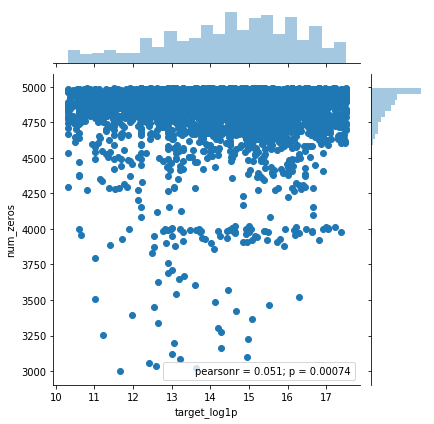

In [40]:
sns.jointplot(train.target_log1p, train.num_zeros)

In [41]:
# Record 36 and 152
customer_sid = 36
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID              01a09167b
target              2e+07
x2160             2.2e+07
target_log1p      16.8112
num_zeros            4990
Name: 36, dtype: object

In [42]:
customer_sid = 152
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID              08cb967e3
target              2e+06
x3671              150000
target_log1p      14.5087
num_zeros            4990
Name: 152, dtype: object

In [43]:
customer_sid = 998
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID              3967ac15e
target           8.78e+06
x356                20000
target_log1p       15.988
num_zeros            4990
Name: 998, dtype: object

In [44]:
train.x356.describe()

count    4.459000e+03
mean     9.551116e+05
std      5.802977e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.328200e+08
Name: x356, dtype: float64

In [47]:
test.x356.describe()

count    4.934200e+04
mean     1.763570e+05
std      4.102696e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.394424e+08
Name: x356, dtype: float64

In [51]:
# how many features are at top 10%
train_quantile = train.loc[:, new_feature_names].quantile(0.90, axis=0, interpolation='higher')
train['num_feat_90th'] = train.loc[:, new_feature_names].apply(lambda x: np.sum(x>train_quantile), axis='columns')

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


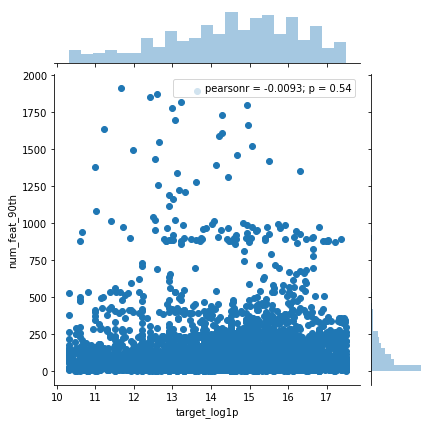

In [52]:
sns.jointplot(train.target_log1p, train.num_feat_90th)